# **Akademik Performans Analizi**


# **1. Veriyi Hazırlama & Tanıma**

In [0]:
import pandas as pd
from google.colab import files

In [3]:
uploaded= files.upload()

Saving xAPI-Edu-Data.csv to xAPI-Edu-Data.csv


In [4]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

User uploaded file "xAPI-Edu-Data.csv" with length 38026 bytes


In [5]:
uploaded

{'xAPI-Edu-Data.csv': b'gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class\r\nM,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M\r\nM,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M\r\nM,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L\r\nM,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L\r\nM,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M\r\nF,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,42,30,13,70,Yes,Bad,Above-7,M\r\nM,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,35,12,0,17,No,Bad,Above-7,L\r\nM,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,50,10,15,22,Yes,Good,Under-7,M\r\nF,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,12,21,16,50,Yes,Good,Under-7,M\r\nF,KW,KuwaIT,MiddleSchool,G-07,B,IT,F,Father,70,80,25,70,Yes,Good,Under-7,M\r\nM,

In [0]:
import io

In [0]:
df = pd.read_csv(io.StringIO(uploaded['xAPI-Edu-Data.csv'].decode('utf-8')))

In [8]:
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [9]:
df.isnull().values.any()

False

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
gender                      480 non-null object
NationalITy                 480 non-null object
PlaceofBirth                480 non-null object
StageID                     480 non-null object
GradeID                     480 non-null object
SectionID                   480 non-null object
Topic                       480 non-null object
Semester                    480 non-null object
Relation                    480 non-null object
raisedhands                 480 non-null int64
VisITedResources            480 non-null int64
AnnouncementsView           480 non-null int64
Discussion                  480 non-null int64
ParentAnsweringSurvey       480 non-null object
ParentschoolSatisfaction    480 non-null object
StudentAbsenceDays          480 non-null object
Class                       480 non-null object
dtypes: int64(4), object(13)
memory usage: 63.8+ KB


In [11]:
df.shape

(480, 17)

# **2. Veri Görselleştirme**

#  2.1. İlgili Kütüphanelerin Yüklenmesi

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt


# 2.2. Sınıflara Göre Öğrenci Sayısı

In [13]:
df['StageID'].value_counts()

MiddleSchool    248
lowerlevel      199
HighSchool       33
Name: StageID, dtype: int64

# 2.3. Eğitim Alan Öğrencilerin Cinsiyet Dağılımı

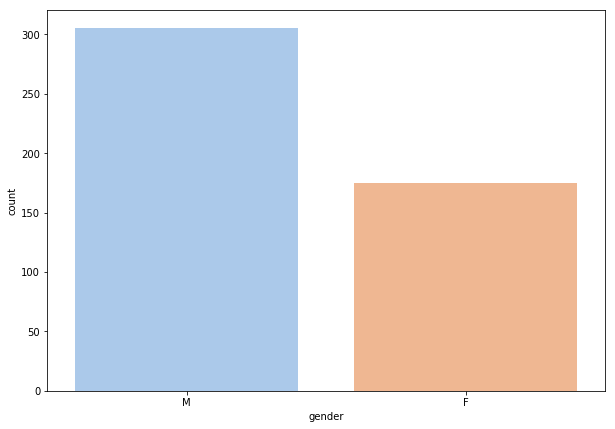

In [14]:

fig= plt.subplots(figsize=(10,7))
sns.countplot(x='gender',data=df,palette="pastel" )
plt.show()

# 2.4. Sınıflara Göre Cinsiyet Dağılımı

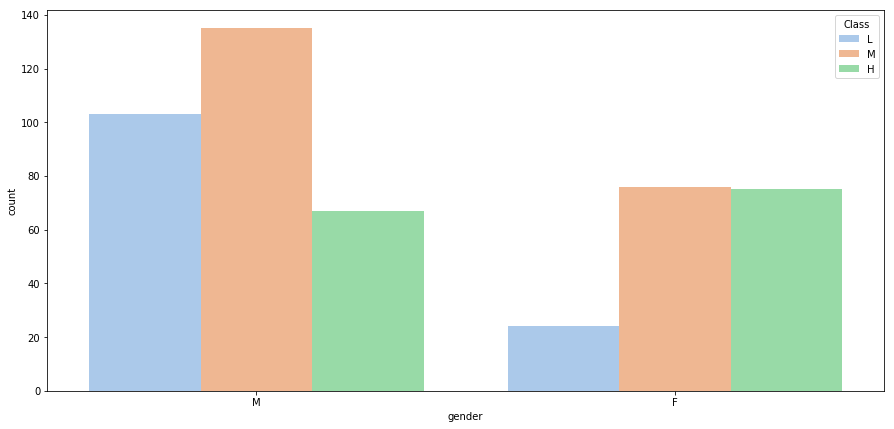

In [15]:

fig= plt.subplots(figsize=(15,7))
sns.countplot(x='gender', hue='Class', data=df,hue_order = ['L', 'M', 'H'],palette="pastel" )
plt.show()

# 2.5. Genel Veli Dağılımı

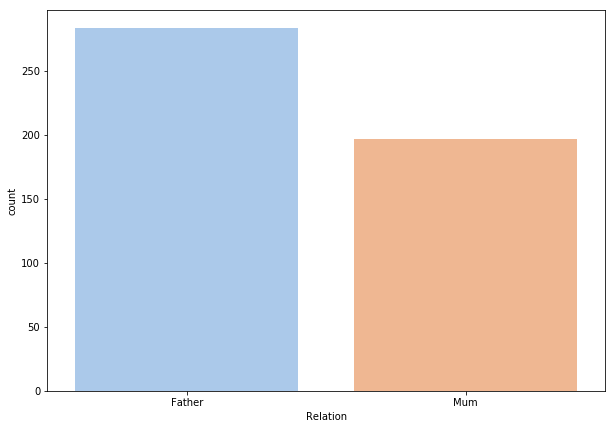

In [87]:


f=plt.figure(figsize=(10,7))
sns.countplot(x="Relation", data=df, palette="pastel");
plt.show()

# 2.6. Sınıflara Göre Veli Dağılımı

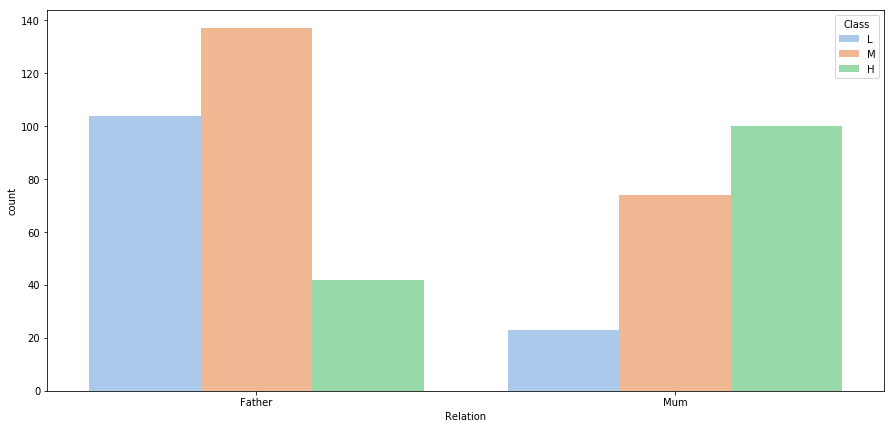

In [88]:

fig= plt.subplots(figsize=(15,7))
sns.countplot(x='Relation', hue='Class', data=df,hue_order = ['L', 'M', 'H'],palette="pastel" )
plt.show()

# 2.7. Anketi Cevaplayan Veliler

([<matplotlib.patches.Wedge at 0x7fc72fbc4e80>,
 [Text(0.21459935421774118, 1.0788638084435536, 'No'),
  Text(-0.21459935421774154, -1.0788638084435533, 'Yes')],
 [Text(0.117054193209677, 0.5884711682419382, '43.8%'),
  Text(-0.1170541932096772, -0.5884711682419381, '56.2%')])

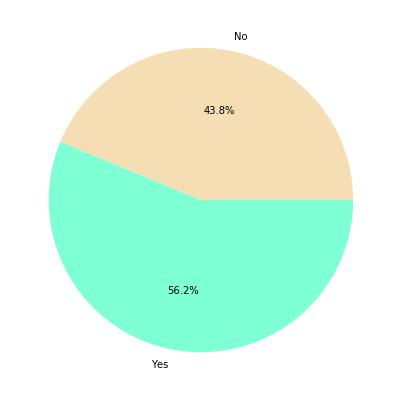

In [89]:


from matplotlib.pyplot import pie
plt.figure(figsize = (7,7))
colors=["wheat","aquamarine"]
count = df.ParentAnsweringSurvey.groupby(df.ParentAnsweringSurvey).count()
Answer = count.keys()
pie(count,labels=Answer, colors=colors, autopct='%1.1f%%')

# 2.8. Ebeveyn okul memnuniyeti

([<matplotlib.patches.Wedge at 0x7fc72fc561d0>,
 [Text(0.367187499852162, 1.0369056562447323, 'Bad'),
  Text(-0.3671874027700463, -1.0369056906233025, 'Good')],
 [Text(0.20028409082845197, 0.5655849034062175, '39.2%'),
  Text(-0.2002840378745707, -0.5655849221581649, '60.8%')])

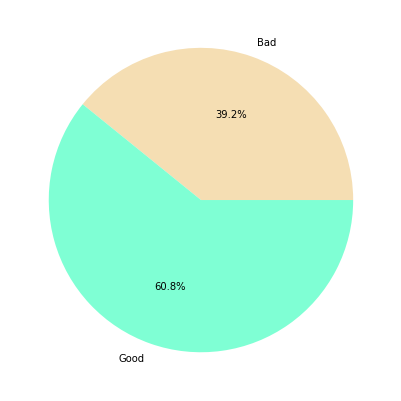

In [90]:

from matplotlib.pyplot import pie
plt.figure(figsize = (7,7))
colors=["wheat","aquamarine"]
count = df.ParentschoolSatisfaction.groupby(df.ParentschoolSatisfaction).count()
Satisfaction = count.keys()
pie(count,labels=Satisfaction, colors=colors, autopct='%1.1f%%')


# 2.9. Vatandaşı Oldukları Ülkeye Göre Öğrenci Yüzdesi

([<matplotlib.patches.Wedge at 0x7fc72fd16518>,
 [Text(1.0980921710516107, 0.06475788658657816, 'Egypt'),
  Text(1.0864571737484023, 0.17207791726608623, 'Iran'),
  Text(1.0369056369067826, 0.3671875544608505, 'Iraq'),
  Text(-0.043185762602839704, 1.0991519412294242, 'Jordan'),
  Text(-0.7929390090164562, -0.7623960440479742, 'KW'),
  Text(0.4342181791359733, -1.0106703581820533, 'Lybia'),
  Text(0.49938949064026056, -0.9801072067065221, 'Morocco'),
  Text(0.6922523804646723, -0.8548605978409549, 'Palestine'),
  Text(0.885667877025822, -0.6523744412563798, 'SaudiArabia'),
  Text(0.9562072269604245, -0.5437533807790581, 'Syria'),
  Text(1.0162674635929674, -0.4209518291233769, 'Tunis'),
  Text(1.0587007448982086, -0.2985845487495601, 'USA'),
  Text(1.0915056963439576, -0.13643795237650158, 'lebanon'),
  Text(1.099976439459457, -0.007199488460701627, 'venzuela')],
 [Text(0.5989593660281513, 0.035322483592679, '1.9%'),
  Text(0.5926130038627648, 0.09386068214513793, '1.3%'),
  Text(0.565

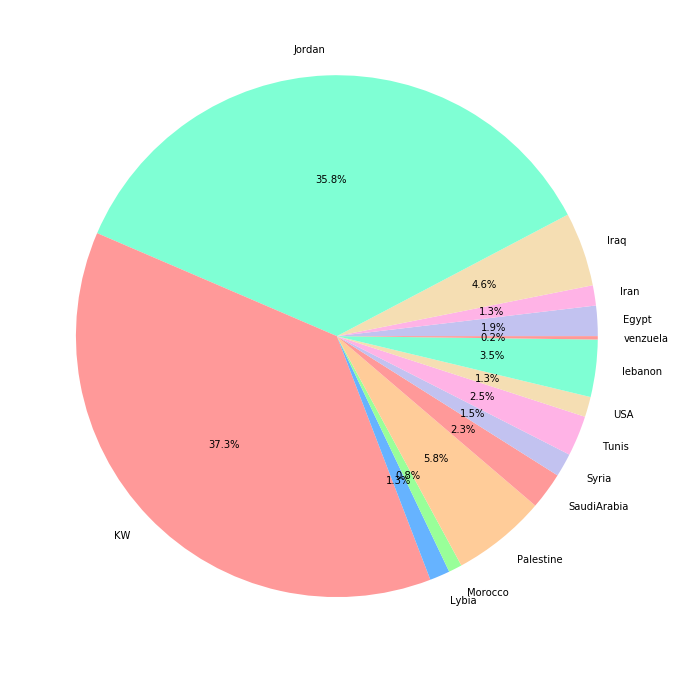

In [91]:
from matplotlib.pyplot import pie
group_by_sum_of_nationalities = df.NationalITy.groupby(df.NationalITy).count()
group_by_sum_of_nationalities_header = group_by_sum_of_nationalities.keys()
plt.figure(figsize = (15,12))
colors=['#c2c2f0','#ffb3e6',"wheat","aquamarine",'#ff9999','#66b3ff','#99ff99','#ffcc99','#ff9999']
#print(group_by_sum_of_nationalities_header)
pie(group_by_sum_of_nationalities,labels=group_by_sum_of_nationalities_header, colors=colors, autopct='%1.1f%%')

# 2.10. İki dönem boyunca öğrencilerin toplam el kaldırma adedi

In [92]:

pd.DataFrame(df['raisedhands'].loc[0:481]).astype(int).sum()

raisedhands    22452
dtype: int64

# 2.11. Kadın- Erkek Öğrencilerin Aldığı Derslerin Dağılımı ve Kadın-Erkek Öğrencilerin Ülkelerine Göre Dağılımları

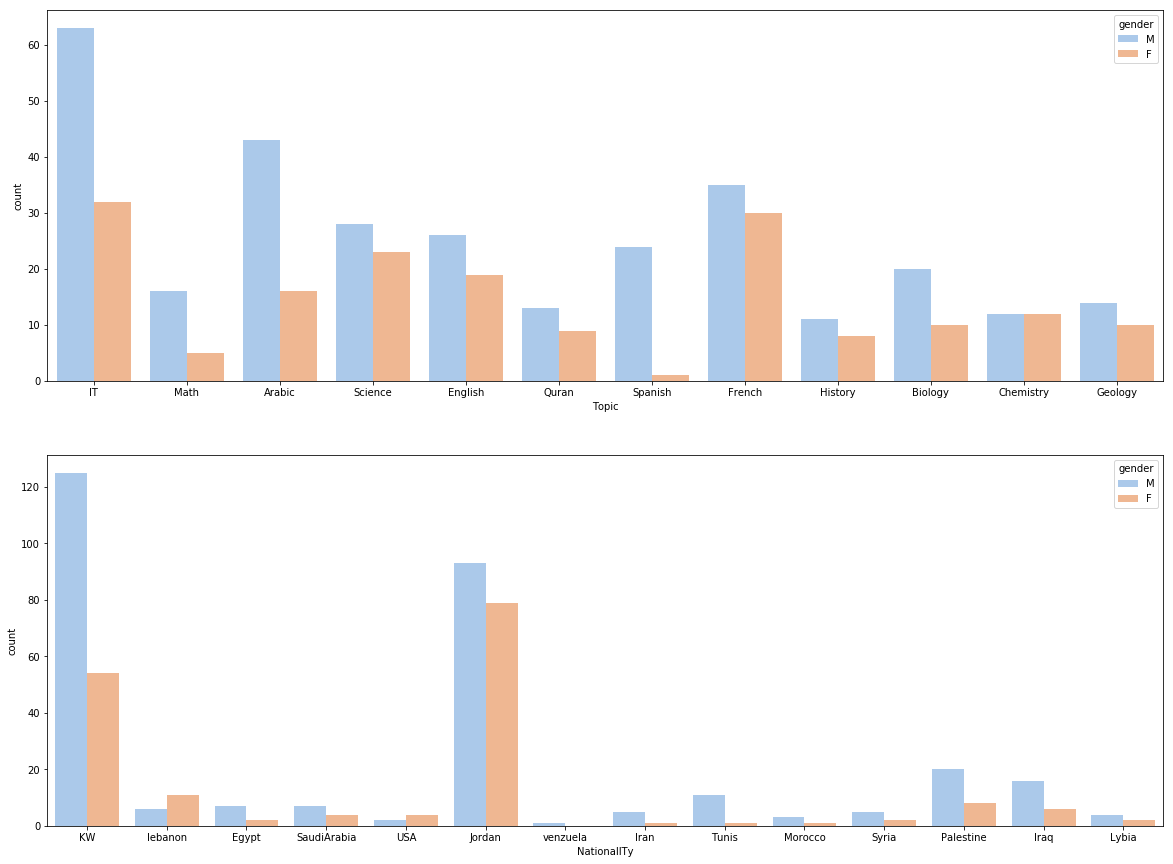

In [93]:

fig, (axis1, axis2)  = plt.subplots(2, 1,figsize=(20,15))
sns.countplot(x='Topic', hue='gender', data=df, ax=axis1, palette="pastel")
sns.countplot(x='NationalITy', hue='gender', data=df, ax=axis2, palette="pastel")

# 2.12. Sınıf Seviyesine Göre Dağılımlar

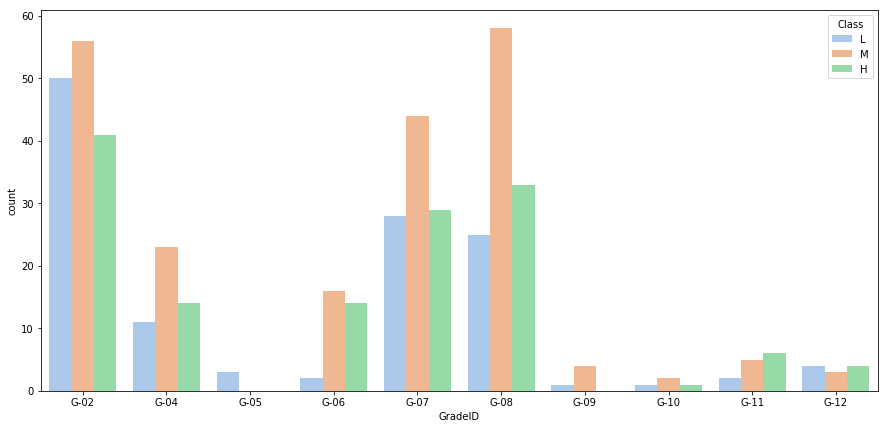

In [16]:
f=plt.figure(figsize=(15,7))
sns.countplot(x='GradeID', hue='Class', data=df, order=['G-02', 'G-04', 'G-05', 'G-06', 'G-07', 'G-08', 'G-09', 'G-10', 'G-11', 'G-12'], hue_order = ['L', 'M', 'H'], palette="pastel")
plt.show()

  2.13. Sınıfa Göre Takip Edilen Kaynaklar- Sınıfa Göre Duyuru Takibi- Sınıfa Göre El Kaldırma- Sınıfa Göre Tartışmalara Katılım

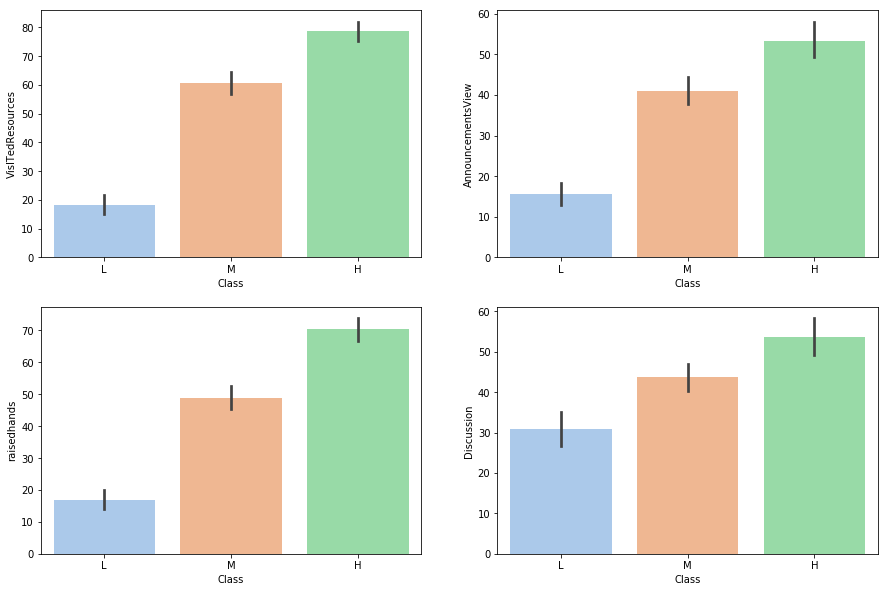

In [95]:
fig, axarr  = plt.subplots(2,2,figsize=(15,10))
sns.barplot(x='Class', y='VisITedResources', data=df, order=['L','M','H'], ax=axarr[0,0],palette="pastel")
sns.barplot(x='Class', y='AnnouncementsView', data=df, order=['L','M','H'], ax=axarr[0,1],palette="pastel")
sns.barplot(x='Class', y='raisedhands', data=df, order=['L','M','H'], ax=axarr[1,0],palette="pastel")
sns.barplot(x='Class', y='Discussion', data=df, order=['L','M','H'], ax=axarr[1,1],palette="pastel")

# 2.14. Sayısal Özellikler Arasındaki İlişkiler

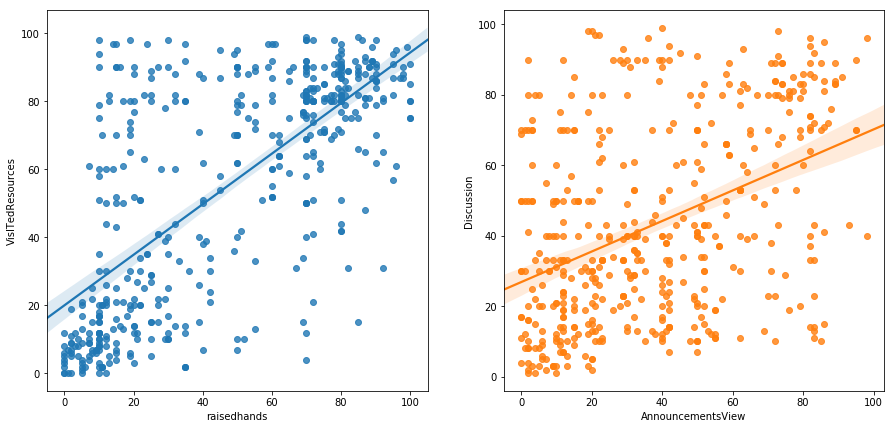

In [96]:
fig, (axis1, axis2)  = plt.subplots(1, 2,figsize=(15,7))
sns.regplot(x='raisedhands', y='VisITedResources', data=df, ax=axis1)
sns.regplot(x='AnnouncementsView', y='Discussion', data=df, ax=axis2)

# **3. Model Seçimi & Uygulanması**





#  3.1. İstatiksel Normalleştirme

In [0]:
df_selected = df.drop(['NationalITy','StageID','SectionID','PlaceofBirth', 'GradeID', "Topic", 'Semester', "Relation", 'ParentAnsweringSurvey', "ParentschoolSatisfaction", 'StudentAbsenceDays', "Class"], 
                        axis = 1)

In [98]:
df_selected

,gender,raisedhands,VisITedResources,AnnouncementsView,Discussion
0,M,15,16,2,20
1,M,20,20,3,25
2,M,10,7,0,30
3,M,30,25,5,35
4,M,40,50,12,50
5,F,42,30,13,70
6,M,35,12,0,17
7,M,50,10,15,22
8,F,12,21,16,50
9,F,70,80,25,70


In [0]:
df_selected_copy=df_selected

In [0]:
df_selected_copy.gender=[1 if i=="M" else 0 for i in df_selected_copy.gender]

In [101]:
df_selected_copy

,gender,raisedhands,VisITedResources,AnnouncementsView,Discussion
0,1,15,16,2,20
1,1,20,20,3,25
2,1,10,7,0,30
3,1,30,25,5,35
4,1,40,50,12,50
5,0,42,30,13,70
6,1,35,12,0,17
7,1,50,10,15,22
8,0,12,21,16,50
9,0,70,80,25,70


In [0]:
y=df_selected_copy.gender.values
x_df=df_selected_copy.drop("gender",axis=1)

In [103]:
y

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,

In [0]:
x=(x_df-np.min(x_df))/(np.max(x_df)-np.min(x_df))

verimizi normalleştirdik/istatiksel normalleştirme






In [105]:
x

,raisedhands,VisITedResources,AnnouncementsView,Discussion
0,0.15,0.161616,0.020408,0.193878
1,0.20,0.202020,0.030612,0.244898
2,0.10,0.070707,0.000000,0.295918
3,0.30,0.252525,0.051020,0.346939
4,0.40,0.505051,0.122449,0.500000
5,0.42,0.303030,0.132653,0.704082
6,0.35,0.121212,0.000000,0.163265
7,0.50,0.101010,0.153061,0.214286
8,0.12,0.212121,0.163265,0.500000
9,0.70,0.808081,0.255102,0.704082


# 3.2. Eğitim ve Test Verilerinin Belirlenmesi

In [0]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=52)

#  3.3. Modelin Uygulanması

# 3.3.1. Support Vektor Machine(SVM) Classification

In [107]:
from sklearn.svm import SVC

svm=SVC(random_state=1)
svm.fit(x_train,y_train)
print("test accuracy is: ",svm.score(x_test,y_test))

test accuracy is:  0.6666666666666666


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


# 3.3.2. Logistic Regression Classification

In [108]:

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
print("test accuracy is {}".format(lr.score(x_test,y_test)))

test accuracy is 0.6458333333333334


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# 3.3.3. Random Forest Classification

In [109]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,random_state=1)
rf.fit(x_train,y_train)
print("test accuracy is: ",rf.score(x_test,y_test))

test accuracy is:  0.7083333333333334


# 3.3.4. Naive Bayes  Classification

In [110]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)
print("test accuracy is: ",nb.score(x_test,y_test))

test accuracy is:  0.59375


#  3.3.5. Decision Tree Classification

In [111]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

print("Atest accuracy is: " ,dt.score(x_test,y_test))

Atest accuracy is:  0.6041666666666666
